# Introduction

Derivatives are used to solve a large variety of modern-day problems. There are three general methods used to calculate derivatives:
1. Symbolic differentiation 
2. Numerical differentiation
3. Automatic differentiation 

Symbolic differentiation can be very useful, but there are some functions that do not have a symbolic derivative. Additionally, symbolic differentiation can be very costly, as it may recalculate the same expressions many times, or the expression for the derivative may grow exponentially. Sometimes we can avoid these issues by numerically differentiating our function. Often this means using finite differences. The method of finite differences calculates derivative at point $x$ by using the following definition:

$$f'(x) = \lim_{h\to 0} f(x) \frac{f(x+h)-f(x)}{h}$$ 

Finite differences can also be very effective in certain situations. However, as with symbolic differentiation, finite differences has its problems. The biggest issue is that to obtain the most accurate estimate of $f'(x)$, we would like to make $h$ as small as possible; in fact, we would like $h$ to be infinitely small. However, we cannot *actually* make $h$ zero, and thus we must compromise and choose some small-but-not-zero value for $h$, which brings us to our second problem: we cannot precisely represent all numbers. Our machines only have a certain level of precision. When we compute our derivatives numerically we introduce error by approximating values to their closest machine equivalent. To avoid these issues, we turn to our third approach: automatic differentiation. Automatic differentiation computes derivatives by repeatedly applying the chain rule to recursively compute derivatives of elementary arithmetic operations and functions.

For our package extension, we chose to implement root finding and a basic function fitting neural network class. Our neural network class is mostly fixed, but allows the dimensions of the input and number of hidden nodes to be changed. Root finding is used in many contexts for optimization, and function fitting is useful for making predictions based on a given set of data.

# How to use the package

## Installation

Please follow these two steps in sequence to install:

1. Clone https://github.com/autodiff-cs207/AutoDiff.git
2. After cloning, please run:

   ` python setup.py install`

## Demos

Note that the demos can only be run locally after installing the AutoDiff package.

Import the package:

In [40]:
from AutoDiff import DiffObj, Variable, Constant
from AutoDiff import MathOps as mo
from AutoDiff.nn import NeuralNet
from AutoDiff.root_finder import ThreadWithReturnValue, vectorNewton
import numpy as np
import matplotlib.pyplot as plt
import math

ImportError: No module named 'api'

### Basic Demo

Some elementary math operators:

In [12]:
val_dict = {'x' : 10, 'y' : 20, 'z' : 1}
x = Variable('x')
y = Variable('y')

In [11]:
f0 = x + y
print('Value:    ', f0.get_val(val_dict))
print('Gradient: ', f0.get_der(val_dict))

Value:     30
Gradient:  {'y': 1, 'x': 1}


In [13]:
f1 = x/y
print('Value:    ', f1.get_val(val_dict))
print('Gradient: ', f1.get_der(val_dict))

Value:     0.5
Gradient:  {'y': -0.025, 'x': 0.05}


In [15]:
c = Constant('c', 5)
print('Value:    ', c.get_val(val_dict))
print('Gradient: ', c.get_der(val_dict,  ['x', 'y']))

Value:     5
Gradient:  {'y': 0, 'x': 0}


In [27]:
f2 = x + y + c
print('Value:    ', f2.get_val(val_dict))
print('Gradient: ', f2.get_der(val_dict))

Value:     35
Gradient:  {'y': 1, 'x': 1}


Other math operators and exponentiation:

In [35]:
val_dict1 = {'x' : 2, 'y' : 0}
val_dict2 = {'x': 3, 'y': math.pi/3, 'z' : 10}
val_dict3 = {'x' : math.pi/2, 'y' : math.pi/4, 'z' : 2}

In [31]:
f3 = -mo.log(x)
print('Value:    ', f3.get_val(val_dict1))
print('Gradient: ', f3.get_der(val_dict1))

Value:     -0.6931471805599453
Gradient:  {'x': -0.5}


In [33]:
c2 = Constant('c2', 4)
f4 = x**c2
print('Value:    ', f4.get_val(val_dict2))
print('Gradient: ', f4.get_der(val_dict2))

Value:     81
Gradient:  {'x': 108.0}


In [36]:
f5 = mo.sin(x + y)
print('Value:    ', f5.get_val(val_dict3))
print('Gradient: ', f5.get_der(val_dict3))

Value:     0.7071067811865476
Gradient:  {'y': -0.7071067811865475, 'x': -0.7071067811865475}


### Newton Raphson Demo
We find one of the roots of the following function using our AutoDiff package:
$$
f(x) = 5^{\left(1 + sin\left(log\left(5 + x^2\right)\right)\right)} - 10
$$

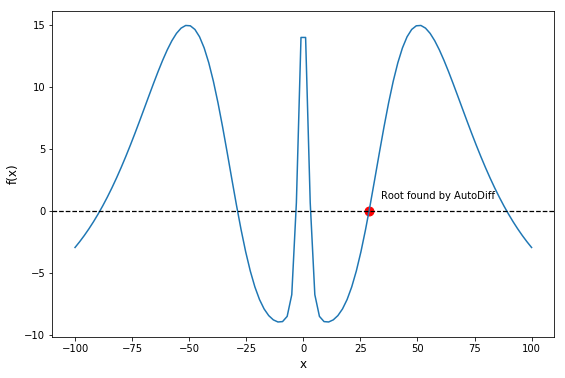

In [5]:
x = Variable('x')
c1 = Constant('c1', 1)
c2 = Constant('c2', 2)
c3 = Constant('c3', 5)
c4 = Constant('c4', 10)
f = c3**(c1 + mo.sin(mo.log(c3 + x**c2))) - c4
tolerance = 0.001
guess = 20
max_iter = 10000
val_dict = {'x' : guess}
evals = []
fx = f.get_val(val_dict)
for i in range(max_iter):
    evals += [fx]
    dx = f.get_der(val_dict)['x']
    val_dict['x'] = val_dict['x'] - fx/dx
    new_fx = f.get_val(val_dict)
    if abs(new_fx - fx) < tolerance: fx = new_fx; break
    fx = new_fx
    
x_vals = np.linspace(-100,100,100)
y_vals = 5**(1+ np.sin(np.log(5 + x_vals**2))) - 10
fig = plt.gcf()
fig.set_size_inches(9,6)
_ = plt.plot(x_vals, y_vals)
_ = plt.axhline(0, color='k', ls='--', lw=1.25)
_ = plt.ylabel('f(x)', fontsize=12)
_ = plt.xlabel('x', fontsize=12)
_ = plt.scatter([val_dict['x']], [fx], color='r', marker='o', s=80)
_ = plt.annotate('Root found by AutoDiff', (val_dict['x']+5, fx+1))

### Root Finder Demo
Finds a root of an input function with AutoDiff's root_finder module

### Neural Network Demo
Trains a neural network to find a fit for a set of inputs and corresponding outputs

In [42]:
input_dim = 1
hidden_dim = 12
out_dim = 1
lr = 0.03
nn = NeuralNet(input_dim, hidden_dim, out_dim, lr)

X_data = np.random.randn(3000, input_dim)
y_data = np.sin(np.multiply(X_data, X_data))
num_train = 2700
X_train, y_train = X_data[0:num_train,:], y_data[0:num_train]
X_test, y_test = X_data[num_train:,:], y_data[num_train:]

In [ ]:
num_epochs = 60
tol = 1e-4
prev_loss = 1e6
for epoch in range(num_epochs):
    running_loss = 0
    for i in range(X_train.shape[0]):
        loss, _ = nn.forward(X_train[i,:], y_train[i])
        running_loss += loss[0]
        nn.backward()
    print('Loss after epoch {} is: {:.4f}'.format(epoch + 1, running_loss))
    if abs(running_loss - prev_loss) < tol:
        print('Training converged, stopping early.')
        break
    prev_loss = running_loss

Loss after epoch 1 is: 437.3997
Loss after epoch 2 is: 283.6424
Loss after epoch 3 is: 233.9360
Loss after epoch 4 is: 215.8767
Loss after epoch 5 is: 205.9851
Loss after epoch 6 is: 198.4853
Loss after epoch 7 is: 192.0134
Loss after epoch 8 is: 185.9574
Loss after epoch 9 is: 180.1476
Loss after epoch 10 is: 174.8731
Loss after epoch 11 is: 170.7053
Loss after epoch 12 is: 168.1047
Loss after epoch 13 is: 165.8508
Loss after epoch 14 is: 160.4183
Loss after epoch 15 is: 150.8010
Loss after epoch 16 is: 140.0492
Loss after epoch 17 is: 130.8035
Loss after epoch 18 is: 123.6714
Loss after epoch 19 is: 118.2950
Loss after epoch 20 is: 114.2022
Loss after epoch 21 is: 111.0263
Loss after epoch 22 is: 108.5076
Loss after epoch 23 is: 106.4648
Loss after epoch 24 is: 104.7779
Loss after epoch 25 is: 103.3884
Loss after epoch 26 is: 102.3034
Loss after epoch 27 is: 101.5802
Loss after epoch 28 is: 101.2912
Loss after epoch 29 is: 101.4759
Loss after epoch 30 is: 102.0646
Loss after epoch 31

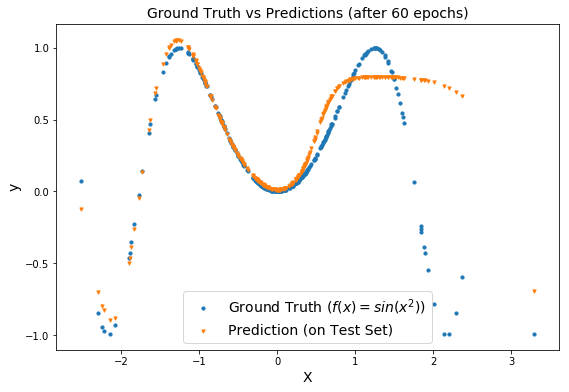

In [41]:
# Test on the test set and plot against train set
y_pred = [0.0]*len(y_test)
for i in range(len(y_test)):
    _, pred = nn.forward(X_test[i,:], y_test[i])
    y_pred[i] = list(pred)[0]
    
fig = plt.gcf()
fig.set_size_inches(9, 6)
_ = plt.scatter(X_test[:,0], y_test, marker='o', s=10, label=r'Ground Truth ($f(x) = sin(x^2)$)')
_ = plt.scatter(X_test[:,0], y_pred, marker='v', s=10, label='Prediction (on Test Set)')
_ = plt.xlabel('X', fontsize=14)
_ = plt.ylabel('y', fontsize=14)
_ = plt.legend(loc='best', fontsize=14)
_ = plt.title('Ground Truth vs Predictions (after {} epochs)'.format(num_epochs), fontsize=14)
fig.savefig('neural_net.png')

# Background
Automatic differentiation (AD) allows us to calculate the derivative to machine precision while avoiding symbolic differentiation's shortcomings. Our package implements on version of AD, the forward mode, by using an extension of the real numbers called the "dual numbers." The forward mode of AD finds the derivative of all intermediate variables with respect to our independent variable and combines them into a final derivative using the chain rule.

AD can also be used in "reverse mode," which we will not discuss in detail her, but this method shares many of the same characteristics as forward mode. However, the reverse mode computes derivatives of the dependent variable with respect to the intermediate variables. 

#### Dual Numbers
To carry out the forward mode AD we utilize dual numbers. Dual numbers are defined as numbers of the form $x + x'\epsilon$, where $\epsilon^2=0$ and $x \in \mathbb{R}^n$. We use operator overloading to redefine elementary operations to suit our problem. To see why this is useful, let's examine how dual numbers behave under different mathematical operations:

Addition: $(x+x'\epsilon) + (y + y'\epsilon) = x+y + (x'+y')\epsilon$

Subtraction: $(x+x'\epsilon) - (y + y'\epsilon) = x-y + (x'-y')\epsilon$

So far, this is as we might expect.

Multiplication: $(x+x'\epsilon) \times (y + y'\epsilon) = xy + y(x')\epsilon+ x(y')\epsilon$

Our definition of $\epsilon$ allows the multiplication of dual numbers to behave like the product rule.

Division: $\frac{(x+x'\epsilon)}{(y + y'\epsilon)} = \frac{(x+x'\epsilon)(y - y'\epsilon)}{(y + y'\epsilon)(y - y'\epsilon)} = \frac{xy+xy'\epsilon-yx'\epsilon}{y^2} = \frac{x}{y}+\epsilon \frac{xy'-yx'}{y^2}$

Division also follows rules for derivatives.

Finally, observe how functions of dual numbers behave:

$f(x+x'\epsilon) = f(x)+\epsilon f'(x)x'$

Which implies the following:

$g(f(x+x'\epsilon)) = g(f(x)+\epsilon f'(x)x') = g(f(x))+\epsilon g'(f(x))f'(x)x'$

The above example illustrates how dual numbers can be used to simultaneously calculate the value of a function at a point, $g(f(x))$, and the derivative, $g'(f(x))f'(x)x'$.

#### Tracing the computational graph
By keeping track of the intermediate values of the derivative we can calculate the derivative of composition of many elementary functions. We can picture this decomposition as a graph or table. For example, consider the following function$^{1}$: $$f\left(x, y, z\right) = \dfrac{1}{xyz} + \sin\left(\dfrac{1}{x} + \dfrac{1}{y} + \dfrac{1}{z}\right).$$

If we want to evaluate $f$ at $\left(1, 2, 3\right)$, we can construct the following table which keeps track for the elementary function, current value, and the elementary function derivative (evaluated with respect to all our variables).

| Trace | Elementary Function | Current Value | Elementary Function Derivative | $\nabla_{x}$ Value  | $\nabla_{y}$ Value  | $\nabla_{z}$ Value  |
| :---: | :-----------------: | :-----------: | :----------------------------: | :-----------------: | :-----------------: | :-----------------: |
| $x_{1}$ | $x_{1}$ | $1$ | $\dot{x}_1$ | $1$ | $0$ | $0$ | 
| $x_{2}$ | $x_{2}$ | $2$ | $\dot{x}_2$ | $0$ | $1$ | $0$ | 
| $x_{3}$ | $x_{3}$ | $3$ | $\dot{x}_3$ | $0$ | $0$ | $1$ | 
| $x_{4}$ | $1/x_{1}$ | $1$ | $-\dot{x}_{1}/x_{1}^{2}$ | $-1$ | $0$ | $0$ | 
| $x_{5}$ | $1/x_{2}$ | $\frac{1}{2}$ | $-\dot{x}_{2}/x_{2}^{2}$ | $0$ | $-\frac{1}{4}$ | $0$ | 
| $x_{6}$ | $1/x_{3}$ | $\frac{1}{3}$ | $-\dot{x}_{3}/x_{3}^{2}$ | $0$ | $0$ | $-\frac{1}{9}$ | 
| $x_{7}$ | $x_4 x_5 x_6$ | $\frac{1}{6}$ | $x_4(x_5\dot{x}_6 + x_6\dot{x}_5) + x_5x_6\dot{x}_4$ | $-\frac{1}{6}$ | $-\frac{1}{12}$ | $-\frac{1}{18}$ | 
| $x_{8}$ | $x_4 + x_5 + x_6$ | $\frac{11}{6}$ | $\dot{x}_4 + \dot{x}_5 + \dot{x}_6$ | $-1$ | $-\frac{1}{4}$ | $-\frac{1}{9}$ | 
| $x_{9}$ | $sin(x_8)$ | $sin(\frac{11}{6})$ | $cos(x_8)\dot{x}_8$ | $-cos(\frac{11}{6})$ | $-\frac{1}{4}cos(\frac{11}{6})$ | $-\frac{1}{9}cos(\frac{11}{6})$ | 
| $x_{10}$ | $x_7 + x_9$ | $sin(\frac{11}{6})+\frac{1}{6}$ | $\dot{x}_7 + \dot{x}_9$ | $-cos(\frac{11}{6})-\frac{1}{6}$ | $-\frac{1}{4}cos(\frac{11}{6})-\frac{1}{12}$ | $-\frac{1}{9}cos(\frac{11}{6})-\frac{1}{18}$ | 

As this example shows, we can use AD for both scalar and vector functions. AD can also be used for vector valued functions. The follow sections will make the implementation of these varients clear.

$^1$Example from Harvard CS207 Homework 4

# Software Organization

## Directory Structure

In [ ]:
```
AutoDiff/
    AutoDiff/
        __init__.py
        nn.py
        root_finder.py
        tests/
            root_finder.py
            AutoDiff.py
        README.md
        AutoDiff_Demo.ipynb
        setup.py
        LICENSE
```

## Basic Modules
Our init file contains our main classes: DiffObj, Variable, Constant, VectorFunction, and MathOps. This main module supports basic automatic differentiation. Our package contains two other modules: nn to support basic function fitting with neural networks, and root_finder to find roots of input functions.

## Testing
Comprehensive tests can be found in the /tests directory. Testing is automated with both TravisCI and Coveralls. In addition, we have also written DocTest code for each class function and our package passes all doctest by running doctest.testmod().

# Implementation Details

## Core Data Structures

There are two core data structures in our implementation:

1. **Lists**: The name_list (a list of strings) representing variable names, that is stored in every Diffobj instance to indicate the variables influencing that instance. Eg. for the DiffObj w, where w represents sin(x)+y, the name_list of Variable x is ['x'], the name_list of Variable y is ['y'] and the name_list of w is ['x','y'].

2. **Dictionaries**: The dictionary value_dict, an argument of DiffObj.get_der, containing names and values that indicate the point in space at which we need to compute derivative and evaluate an expression, for example in w.get_val(value_dict). We also use Dictionarie for storing partial derivatives with respect to variables.

## Core Classes

1. Class DiffObj()
Any function for which a user wants to evaluate its value and gradient, will be represented by an instance of this class DiffObj, or by instances of classes which inherit from DiffObj (e.g. class Variable, class Constant etc.) A mathematical equivalent of a DiffObj object will be:

a constant such as  5.0 , which we have implemented via a Sub-class 'Constant'
a variable such as  x , which we have implemented via a Sub-class 'Variable'
a mathematical expression such as  x2+sin(y) .
DiffObj enforces that each class which inherits from it, must implement two functions: get_der, and get_val.

2. Class Variable(DiffObj)
This subclass inherits from DiffObj, and is basically used for representing a variable such as x or y.

3. Class Constant(DiffObj)
This subclass inherits from DiffObj and is used for representing constants, such as 5 in f(x) = 5x.

4. Class MathOps()
This class inherits from the DiffObj class. It implements non-elementary unary functions
including: sin, cos, tan, log, exp.

5. Class NeuralNet()
This class is used to represent a neural net to produce a function fit based on a given dataset. It takes in an input dimension, output dimension, hidden node dimension, and learning rate. As shown in the demo, the user can select a tolerance and number of epochs to train the neural net for and see loss at every step.

6. Class vectorNewton()
Used for root finding. vectorNewton is initialized with a function; the user can then call the find_root()

## Dependencies

## Elementary Functions